In [1]:
import numpy as np
import sounddevice as sd

import matplotlib.pyplot as plt
import cv2
# Read an RGB image


In [2]:
img = cv2.imread('data/1_20_Imagen1.png')

In [3]:
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

In [15]:
a = '1111'
int(a,2)

15

In [5]:
r_binary = np.array([format(i, '08b') for i in r])

In [13]:
r_binary

array(['00000000', '00000000', '00000000', '00000000', '00000000',
       '00000000', '00000000', '00000000', '00000000', '00000000',
       '00000000', '00000000', '00000000', '00000000', '00000000',
       '00000000', '00000000', '00000000', '00000000', '00000000',
       '00000000', '00000000', '00000000', '00000000', '00000000',
       '00000000', '00000000', '00000000', '00000000', '00000000',
       '00000000', '00000000', '00000000', '00000000', '00000000',
       '00000000', '00000000', '00000000', '00000000', '00000000',
       '00000000', '00000000', '00000000', '00000000', '00001110',
       '00001110', '00001110', '00000000', '00001110', '00001110',
       '00001110', '00001110', '00001110', '00001110', '00001110',
       '00001110', '00000000', '00000000', '00000000', '00000000',
       '00000000', '00000000', '00000000', '00000000', '00001110',
       '00001110', '00001110', '00001110', '00001110', '00001110',
       '00001110', '00001110', '00001110', '00001110', '000000

In [6]:
r_binary_separated = [i[j:j+4] for i in r_binary for j in range(0, len(i), 4)]

In [7]:
recombined = [r_binary_separated[i]+r_binary_separated[i+1] for i in range(0, len(r_binary_separated), 2)]

In [11]:
r_binary_separated

['0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '0000',
 '1110',
 '0000',
 '1110',
 '0000',
 '1110',
 '0000',
 '0000',
 '0000',
 '1110',
 '0000',
 '1110',
 '0000',
 '1110',
 '0000',
 '1110',
 '0000',
 '1110',
 '0000',
 '1110',
 '0000',
 '1110',
 '0000',
 

In [12]:
def create_freq_dict(channelFreq: float, bandwidth: float, n: int) -> dict:
    """ Creates a dictionary of frequencies for the given channel """
    freqDict = {}
    freqs = np.linspace(channelFreq - bandwidth / 2 + bandwidth / (2 * n),
                        channelFreq + bandwidth / 2 - bandwidth / (2 * n), n)

    for index, item in enumerate(freqs):
        freqDict[index] = item

    return freqDict

In [9]:
rFreqDict = create_freq_dict(1000,3000,4)

In [ ]:
    bitList = [item for sublist in self.textBinData for item in sublist] # flatten the list
    audio = []
    tHeader = np.linspace(0, self.headerDuration, int(self.sampleRate * self.headerDuration))

    # Create chirp header. Duration 10 times freqDuration = 1 second.
    header = signal.chirp(tHeader, self.headerF1, self.headerDuration, self.headerF2, method='linear')

    for bit in bitList:
        #print(bit)
        t = np.linspace(0, self.freqDuration, int(self.sampleRate * self.freqDuration))
        audio.append(np.sin(2 * np.pi * self.textFreqDict[int(bit)] * t))

    audio = np.hstack(audio)

    # Add header to the beginning and end of the audio. The end header is flipped for reverse correlation.
    audio = np.concatenate((header, audio, np.flip(header)))
    return audio

In [10]:


audio = []
for bit in r_binary_separated:
    t = np.linspace(0, 0.2, int(44100 * 0.2))
    audio.append(np.sin(2 * np.pi * rFreqDict[int(bit)] * t))

audio = np.hstack(audio)

KeyError: 1110

In [57]:
from scipy.io import wavfile

In [58]:
sender = Sender(600, 800)
sender.load_text('./data/text.txt')
audio = sender.send_text()
wavfile.write("audio2.wav", 44100, audio)

['10100001', '01001100', '01100001', '01100010', '01101111', '01110010', '01100001', '01110100', '01101111', '01110010', '01101001', '01101111', '00100000', '01100100', '01100101', '00100000', '01010100', '01100101', '01100011', '01101110', '01101111', '01101100', '01101111', '01100111', '11101101', '01100001', '01110011', '00100000', '01100100', '01100101', '00100000', '01001001', '01101110', '01100110', '01101111', '01110010', '01101101', '01100001', '01100011', '01101001', '11110011', '01101110', '00100000', '01111001', '00100000', '01100100', '01100101', '00100000', '01000011', '01101111', '01101101', '01110101', '01101110', '01101001', '01100011', '01100001', '01100011', '01101001', '11110011', '01101110', '00100000', '01000101', '01001100', '00110101', '00110010', '00110000', '00110111', '00100001', '00100000', '01010100', '01110010', '01100001', '01101110', '01110011', '01101101', '01101001', '01110011', '01101111', '01110010', '00100000', '01101110', '11111010', '01101101', '01

In [10]:
# This is a sample Python script.
import matplotlib.pyplot as plt
import pickle
# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
from Sender import *
from Receiver import *

import sounddevice as sd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile

# Press the green button in the gutter to run the script.


sender = Sender(600, 800)
sender.load_image('/Users/francisco/Documents/Semestre 12/Lab TICS/TICs_project/data/1_20_Imagen1.png')
audio = sender.send_image()
#wavfile.write('audio3.wav', 44100,audio)
sender.playText(audio)
#wavfile.write('audio3.wav', 44100,audio)


# receiver = Receiver(600, 800)
# audio = receiver.listen(60)
# wavfile.write("audio2.wav", 44100, audio)
# print("Done listening")

# fs, audio = wavfile.read("audio1.wav")

# audio = audio[44100:]

# # Normalize signal

# audio = audio/np.max(np.abs(audio))
# audio = audio - np.mean(audio)

# # Plot signal

# plt.plot(audio)
# plt.show()

# # Demodulate signal




In [2]:
receiver = Receiver(600, 800)
bits = receiver.demodulateImage(audio)

header


In [3]:
# Supongamos que 'lista' es tu lista original de 1s y 0s
lista_str = [''.join(map(str, bits[i:i+8])) for i in range(0, len(bits), 8)]

In [4]:
lista_str

['00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00001110',
 '00001110',
 '00001110',
 '00000000',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00000000',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00001110',
 '00000000',
 '00001110',
 '00001110',

In [37]:
int('00000000',2)

0

In [5]:
def bits_to_image( bits_list):
    values = [int(bits_str, 2) for bits_str in bits_list]
    values = np.array(values)
    sqr_shape = int(np.sqrt(len(values)))
    values = values.reshape(sqr_shape,sqr_shape)
    return values


In [6]:
decoded_text = bits_to_image(lista_str)


In [7]:
decoded_text.shape


(20, 20)

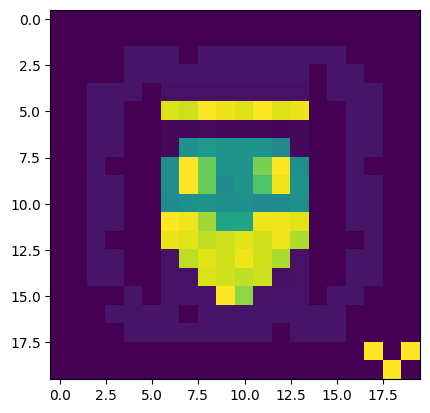

In [8]:
plt.imshow(decoded_text)